##Customer Purchase Behavior Analysis using Descriptive Statistics

###Git Link
https://github.com/harshnarain14/Data-analysis-project-/blob/Projects/Discriptive_Statstics_Summative_assessment.ipynb


###import data

In [ ]:
#Import liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats

data= pd.read_excel('/content/drive/MyDrive/Data sets/Superstore Marketing Data.xlsx')
data.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0


##Task 1 - Basic CleanUp

- **Clean and preprocess the dataset (handling missing values, data types, etc.).**

- **Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
#Dt_customer have invalid values '########' we need to convert it into null value first.

data['Dt_Customer']= data['Dt_Customer'].replace('########',np.nan)

#Convert Dt_Customer into datetime

data['Dt_Customer']= pd.to_datetime(data['Dt_Customer'])

#Convert Education and Marital status in categorical variable

data['Education']=data['Education'].astype('category')
data['Marital_Status']=data['Marital_Status'].astype('category')

In [ ]:
# Impute null values
data.isnull().sum()
#impute income with median
data['Income']=data['Income'].fillna(data['Income'].median())
data.isnull().sum()
#We cannot remove or impute Dt_Customer because its needed in analysis of recency of customers and imputation is not recommended in Date time variable.
data['Customer_Tenure_Days'] = (pd.Timestamp.today() - data['Dt_Customer']).dt.days
data.head(10)

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Customer_Tenure_Days
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,189,218,1,4,4,6,1,1,0,3967.0
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,37,1,7,3,7,5,1,0,3968.0
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,2,30,1,3,2,5,2,0,0,4001.0
3,1386,1967,Graduation,Together,32474.0,1,1,NaT,0,10,...,0,0,1,1,0,2,7,0,0,NaN
4,5371,1989,Graduation,Single,21474.0,1,0,NaT,0,6,...,0,34,2,3,1,2,7,1,0,NaN
5,7348,1958,PhD,Single,71691.0,0,0,2014-03-17,0,336,...,32,43,1,4,7,5,2,1,0,4058.0
6,4073,1954,2n Cycle,Married,63564.0,0,0,2014-01-29,0,769,...,34,65,1,10,10,7,6,1,0,4105.0
7,1991,1967,Graduation,Together,44931.0,0,1,2014-01-18,0,78,...,0,7,1,2,1,3,5,0,0,4116.0
8,4047,1954,PhD,Married,65324.0,0,1,NaT,0,384,...,32,5,3,6,2,9,4,0,0,NaN
9,9477,1954,PhD,Married,65324.0,0,1,NaT,0,384,...,32,5,3,6,2,9,4,0,0,NaN


In [ ]:
#Check dupilicates
data.duplicated().sum()

np.int64(0)

In [ ]:
data.describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Customer_Tenure_Days
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,1324,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,1324.000000
mean,5592.159821,1968.805804,52237.975446,0.444196,0.506250,2013-07-19 09:00:32.628398848,49.109375,303.935714,26.302232,166.950000,...,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375,4298.624622
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3954.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,2013-01-26 00:00:00,24.000000,23.750000,1.000000,16.000000,...,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,4119.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-21 12:00:00,49.000000,173.500000,8.000000,67.000000,...,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,4296.500000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,2014-01-15 00:00:00,74.000000,504.250000,33.000000,232.000000,...,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,4473.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,4653.000000
std,3246.662198,11.984069,25037.955891,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,...,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391,202.224699


##Task 2 - Descriptive Statistics 📊

- **Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. Identify and handle outliers if necessary.**


In [ ]:
#Create discriptive Statistics table

column=[
    'Age', 'Income', 'Total_Children', 'Total_Spending',
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
    'NumStorePurchases', 'NumWebVisitsMonth', 'Recency'
]
#Creating more Features for better understanding data
data['Age'] = 2024 - data['Year_Birth']
data['Total_Children'] = data['Kidhome'] + data['Teenhome']
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts',
                 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
data['Total_Spending'] = data[spending_cols].sum(axis=1)

Discriptive_Table= data[column].describe()
Discriptive_Table


,Age,Income,Total_Children,Total_Spending,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,55.194196,52237.975446,0.950446,605.798214,2.325000,4.084821,2.662054,5.790179,5.316518,49.109375
std,11.984069,25037.955891,0.751803,602.249288,1.932238,2.778714,2.923101,3.250958,2.426645,28.962453
min,28.000000,1730.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,35538.750000,0.000000,68.750000,1.000000,2.000000,0.000000,3.000000,3.000000,24.000000
50%,54.000000,51381.500000,1.000000,396.000000,2.000000,4.000000,2.000000,5.000000,6.000000,49.000000
75%,65.000000,68289.750000,1.000000,1045.500000,3.000000,6.000000,4.000000,8.000000,7.000000,74.000000
max,131.000000,666666.000000,3.000000,2525.000000,15.000000,27.000000,28.000000,13.000000,20.000000,99.000000


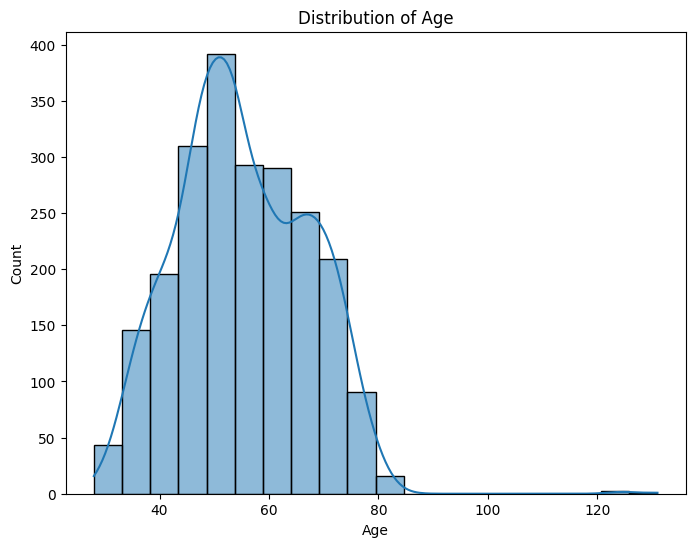

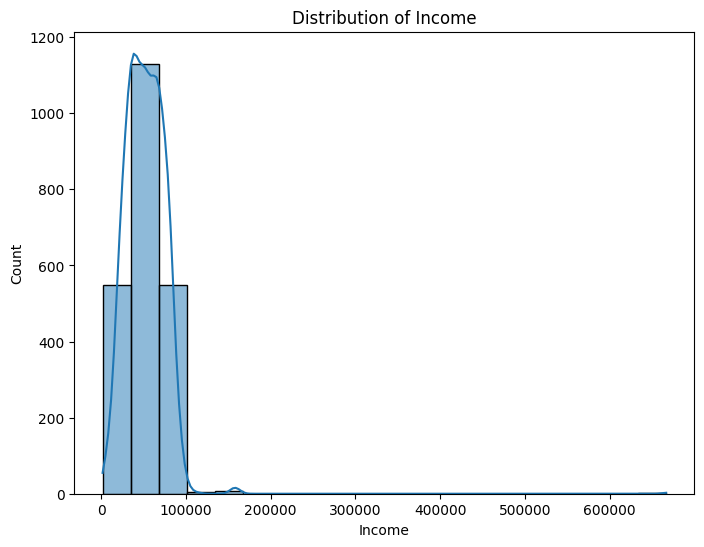

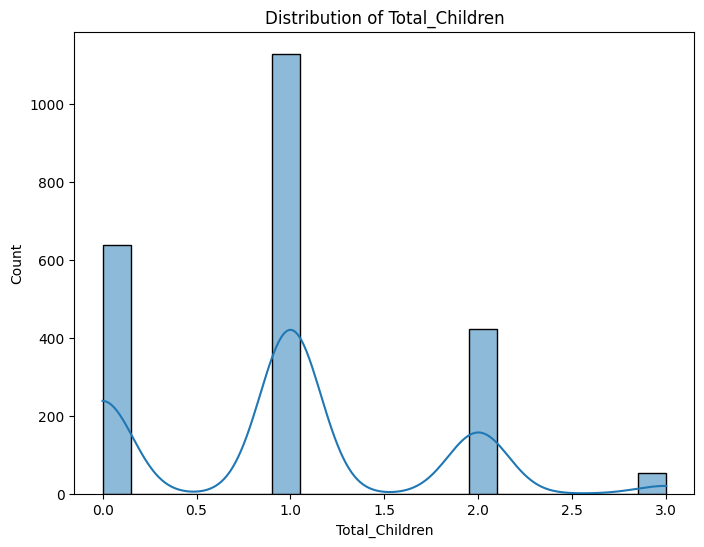

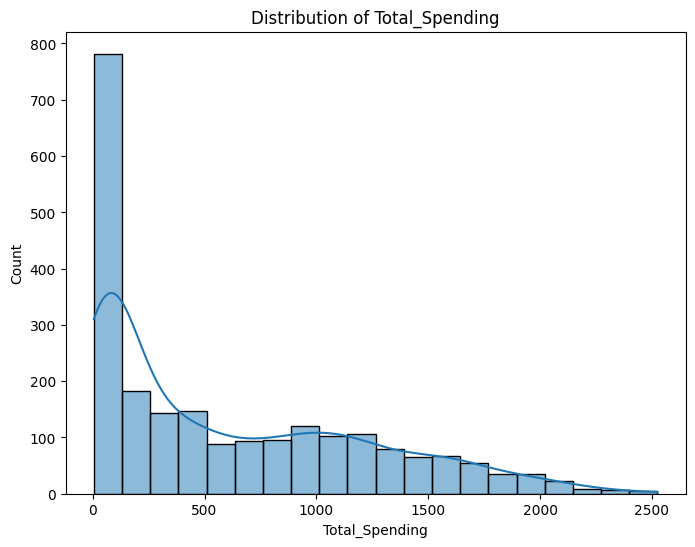

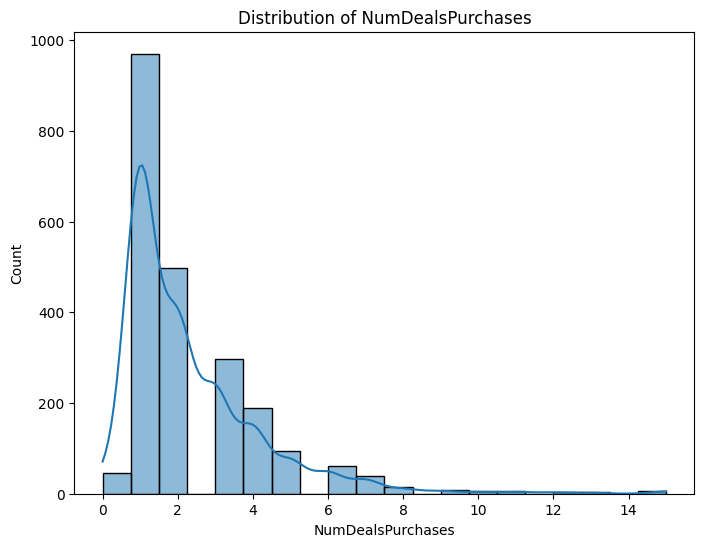

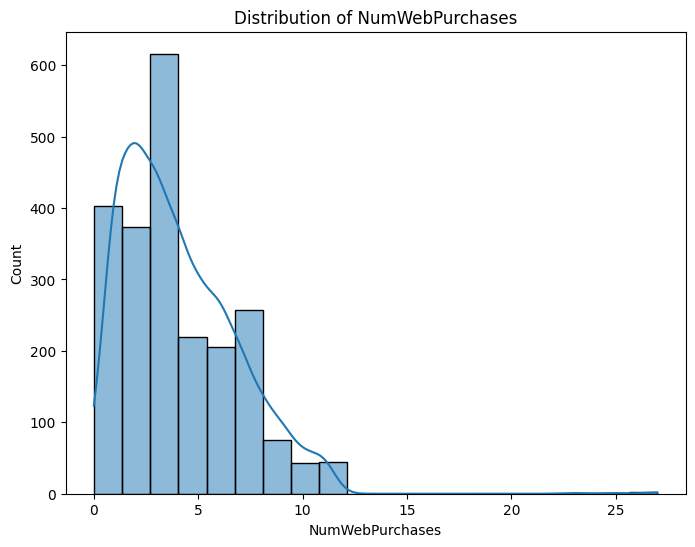

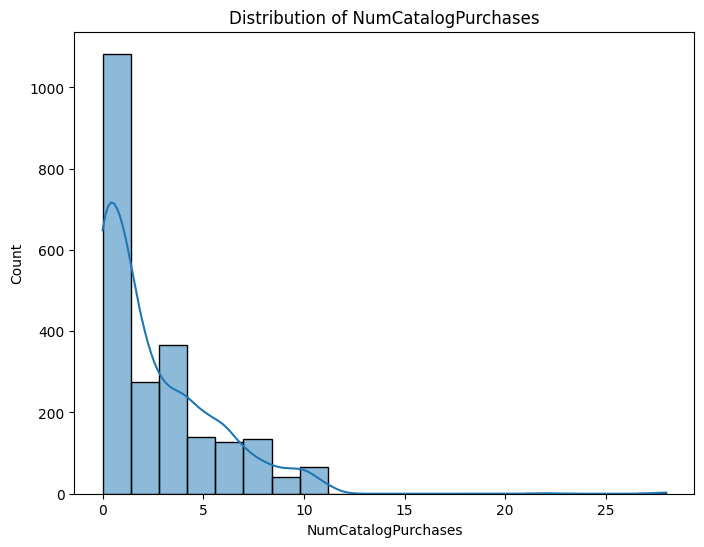

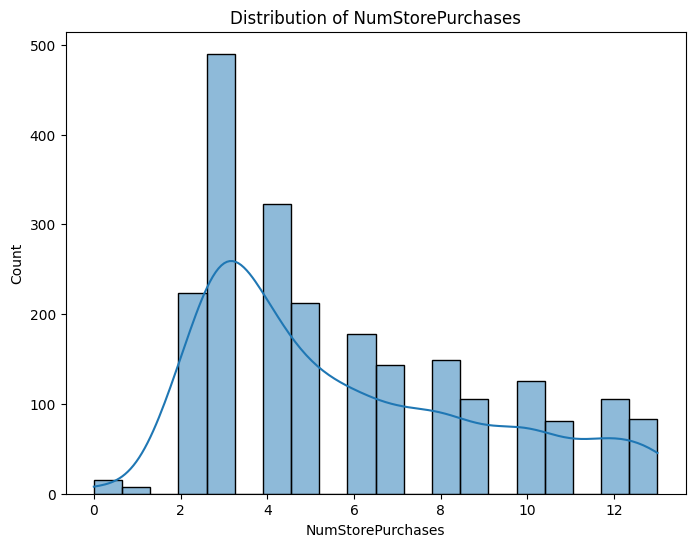

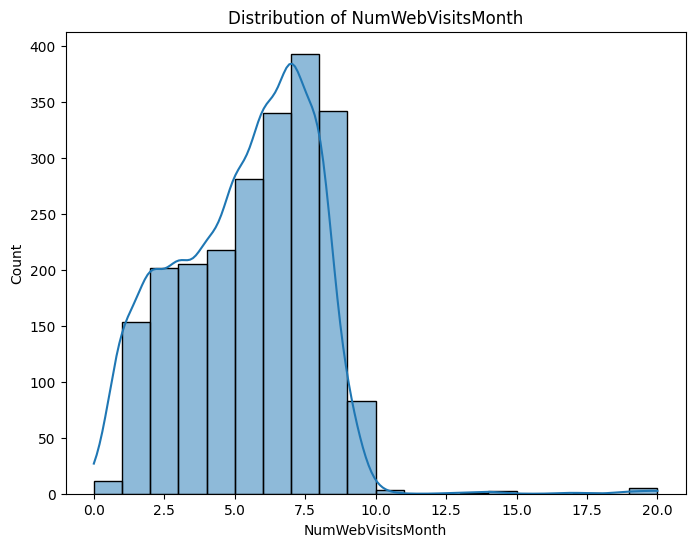

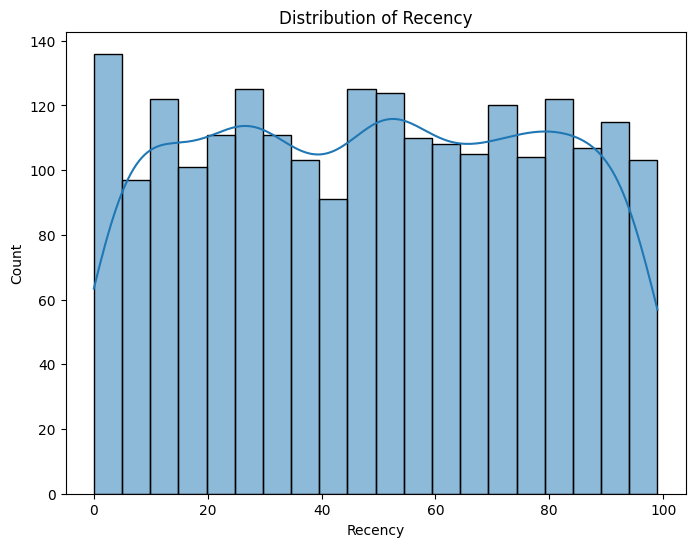

In [ ]:
#Checking for Distribution of Each Variable
for col in column:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)

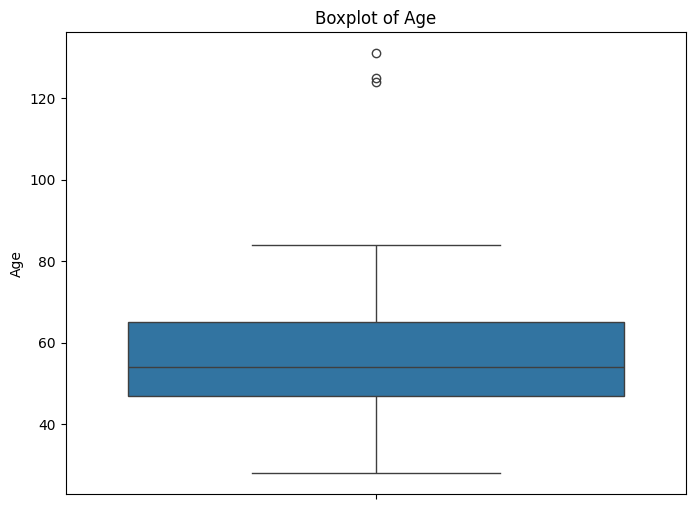

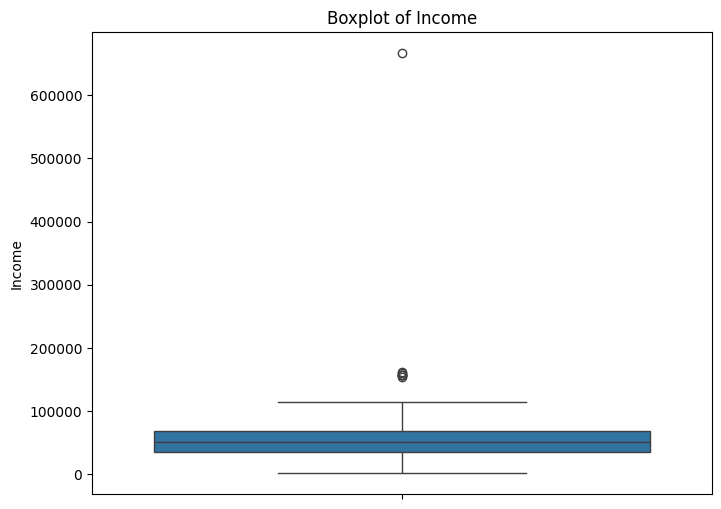

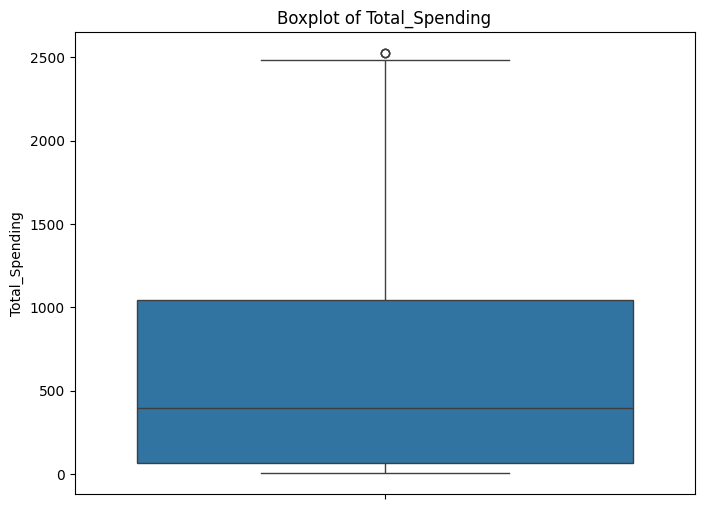

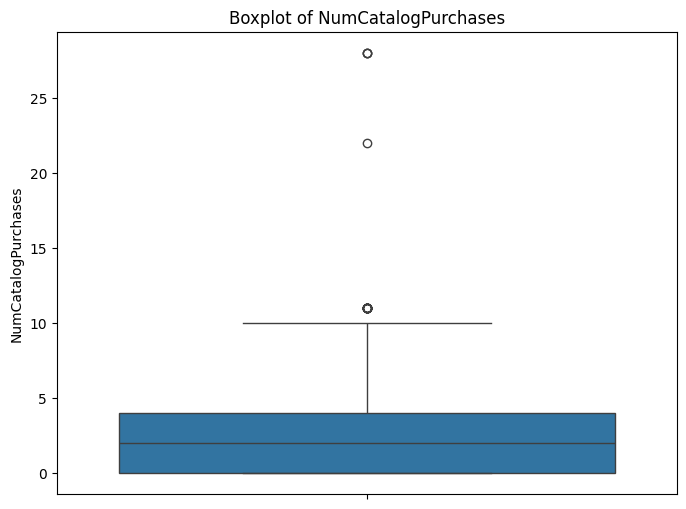

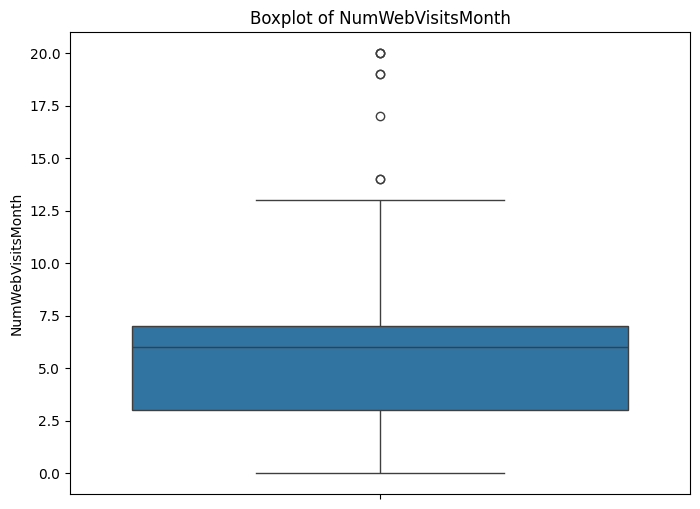

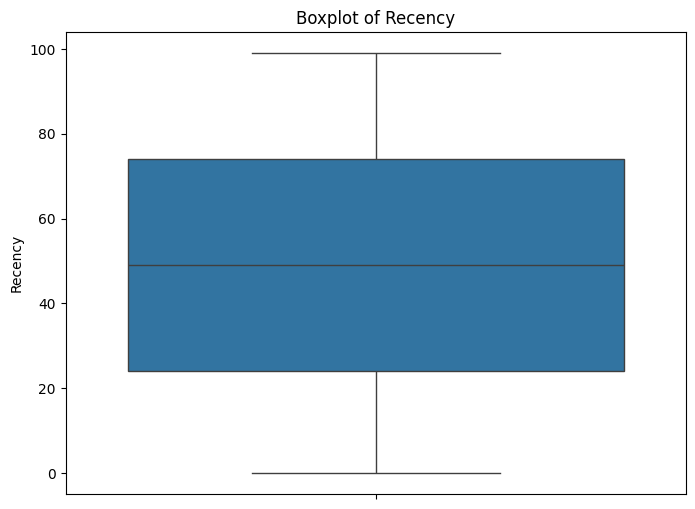

In [ ]:
#Cheking for outliers

#Plotting Boxplot for each important numerical variable
imp_column=column=[
    'Age', 'Income', 'Total_Spending','NumCatalogPurchases', 'NumWebVisitsMonth', 'Recency']
for col in imp_column:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()




In [ ]:
#Treat outliers
#For Age we need to check values which are outliers
Q1=data['Age'].quantile(0.25)
Q3=data['Age'].quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(data[(data['Age']<lower_limit) | (data['Age']>upper_limit)])
#As we check Age have three outliers which is more than 100 years of age we need to them
data=data.drop(data[(data['Age']<lower_limit) | (data['Age']>upper_limit)].index)






         Id  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
513   11004        1893  2n Cycle         Single  60182.0        0         1   
827    1150        1899       PhD       Together  83532.0        0         0   
2233   7829        1900  2n Cycle       Divorced  36640.0        1         0   

     Dt_Customer  Recency  MntWines  ...  NumWebPurchases  \
513   2014-05-17       23         8  ...                1   
827   2013-09-26       36       755  ...                4   
2233  2013-09-26       99        15  ...                2   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Response  \
513                     0                  2                  4         0   
827                     6                  4                  1         0   
2233                    1                  2                  5         0   

      Complain  Customer_Tenure_Days  Age  Total_Children  Total_Spending  
513          0                3997.0  131        

In [ ]:
# remove 666666 entry because it seems to be abnormal
data = data[data['Income'] != 666666]
#remove all outliers using IQR method
Q1=data['Income'].quantile(0.25)
Q3=data['Income'].quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(data[(data['Income']<lower_limit) | (data['Income']>upper_limit)])
data=data.drop(data[(data['Income']<lower_limit) | (data['Income']>upper_limit)].index)

         Id  Year_Birth   Education Marital_Status    Income  Kidhome  \
325    4931        1977  Graduation       Together  157146.0        0   
497    1501        1982         PhD        Married  160803.0        0   
731    1503        1976         PhD       Together  162397.0        1   
853    5336        1971      Master       Together  157733.0        1   
1826   5555        1975  Graduation       Divorced  153924.0        0   
1925  11181        1949         PhD        Married  156924.0        0   
2204   8475        1973         PhD        Married  157243.0        0   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebPurchases  \
325          0  2013-04-29       13         1  ...                0   
497          0         NaT       21        55  ...                0   
731          1         NaT       31        85  ...                0   
853          0         NaT       37        39  ...                1   
1826         0         NaT       81         1  ...          

In [ ]:
# Check outliers for Total Spending
Total_Spending_Q1=data['Total_Spending'].quantile(0.25)
Total_Spending_Q3=data['Total_Spending'].quantile(0.75)
Total_Spending_IQR=Total_Spending_Q3-Total_Spending_Q1
Total_Spending_lower_limit=Total_Spending_Q1-1.5*Total_Spending_IQR
Total_Spending_upper_limit=Total_Spending_Q3+1.5*Total_Spending_IQR
print(data[(data['Total_Spending']<Total_Spending_lower_limit) | (data['Total_Spending']>Total_Spending_upper_limit)])

print(data['Total_Spending'])

        Id  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
671   5735        1991      Master         Single  90638.0        0         0   
672   5350        1991      Master         Single  90638.0        0         0   
1404  1763        1988  Graduation       Together  87679.0        0         0   

     Dt_Customer  Recency  MntWines  ...  NumWebPurchases  \
671   2014-02-13       29      1156  ...                3   
672   2014-02-13       29      1156  ...                3   
1404  2013-07-27       62      1259  ...                7   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Response  \
671                     4                 10                  1         0   
672                     4                 10                  1         1   
1404                   11                 10                  4         1   

      Complain  Customer_Tenure_Days  Age  Total_Children  Total_Spending  
671          0                4090.0   33    

In [ ]:
#Checking for outliers NumCatalogPurchases
NumCatalogPurchases_Q1=data['NumCatalogPurchases'].quantile(0.25)
NumCatalogPurchases_Q3=data['NumCatalogPurchases'].quantile(0.75)
NumCatalogPurchases_IQR=NumCatalogPurchases_Q3-NumCatalogPurchases_Q1
NumCatalogPurchases_lower_limit=NumCatalogPurchases_Q1-1.5*NumCatalogPurchases_IQR
NumCatalogPurchases_upper_limit=NumCatalogPurchases_Q3+1.5*NumCatalogPurchases_IQR
print(data[(data['NumCatalogPurchases']<NumCatalogPurchases_lower_limit) | (data['NumCatalogPurchases']>NumCatalogPurchases_upper_limit)])
#So here we need to perfrom capping because data is very less and we cannot afford row loss
data['NumCatalogPurchases']=np.where(data['NumCatalogPurchases']>NumCatalogPurchases_upper_limit,NumCatalogPurchases_upper_limit,data['NumCatalogPurchases'])
print("After Capping",data[(data['NumCatalogPurchases']<NumCatalogPurchases_lower_limit) | (data['NumCatalogPurchases']>NumCatalogPurchases_upper_limit)])






         Id  Year_Birth   Education Marital_Status   Income  Kidhome  \
292    2324        1972  Graduation       Together  77044.0        0   
399    5718        1950  Graduation        Married  80763.0        0   
434   10102        1966  Graduation          Widow  79946.0        0   
588    7627        1975      Master        Married  92163.0        0   
661    4299        1960  Graduation       Together  70971.0        0   
678   10524        1963      Master       Divorced  49476.0        0   
803    8908        1959  Graduation        Married  87195.0        0   
911    6246        1953  Graduation         Single  73892.0        0   
961    5376        1979  Graduation        Married   2447.0        1   
1275   1139        1984         PhD        Married  73356.0        0   
1368   2109        1990  Graduation         Single  96843.0        0   
1404   1763        1988  Graduation       Together  87679.0        0   
1489   9058        1955  Graduation          Widow  79800.0     

## Task 3 - Probability Distributions 🎲

- **Identify variables that could follow specific probability distributions (e.g., Binomial, Normal). Calculate probabilities and expected values based on these distributions.**

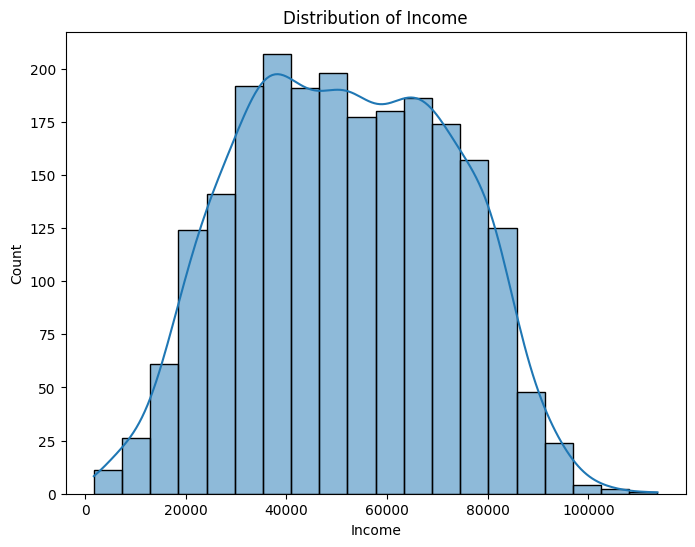

Expected value: 51619.5042620009
Probability Income < 50000: 0.4686705932314291
Probability Income > 50000: 0.5313294067685709
Probability Income = 20000: 1.9305242704736133e-05


In [ ]:
#check Distribution of Each important variables
#Check Income is normally distributed or not.
plt.figure(figsize=(8, 6))
sns.histplot(data['Income'], bins=20, kde=True)
plt.title(f'Distribution of Income')
plt.xlabel('Income')
plt.show()
# AS we can check Income is not Correctly normally distributed but it follows normal disctribution at some extends


from scipy.stats import norm

#calculate Expected values
mu= data['Income'].mean()
sigma = data['Income'].std()
print("Expected value:", mu)

## Probability Income < 50000

prob=norm.cdf(50000,mu,sigma)
print("Probability Income < 50000:", prob)

## Probability Income > 50000
print("Probability Income > 50000:", 1-prob)

# probabilithy of income should be 20000

prob=norm.pdf(50000,mu,sigma)
print("Probability Income = 20000:", prob)







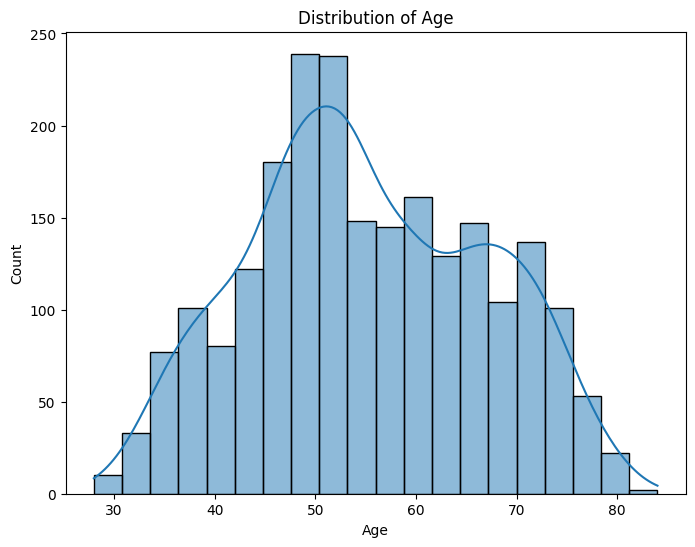

Expected Age (Mean): 55.11126065500224
Standard Deviation of Age: 11.707429996646272
Probability that Age < 40: 0.0984
Probability that Age > 40: 0.9016


In [ ]:
#check distribution for Age
# 1. Plot Distribution
plt.figure(figsize=(8,6))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.show()

# 2. Calculate Expected value (mean) and standard deviation
mu_age = data['Age'].mean()
sigma_age = data['Age'].std()

print(f"Expected Age (Mean): {mu_age}")
print(f"Standard Deviation of Age: {sigma_age}")

# 3. Calculate Probability: Example -> Probability Age < 40
prob_age_less_40 = norm.cdf(40, mu_age, sigma_age)
print(f"Probability that Age < 40: {prob_age_less_40:.4f}")

prob_age_greater_40 = 1 - prob_age_less_40
print(f"Probability that Age > 40: {prob_age_greater_40:.4f}")




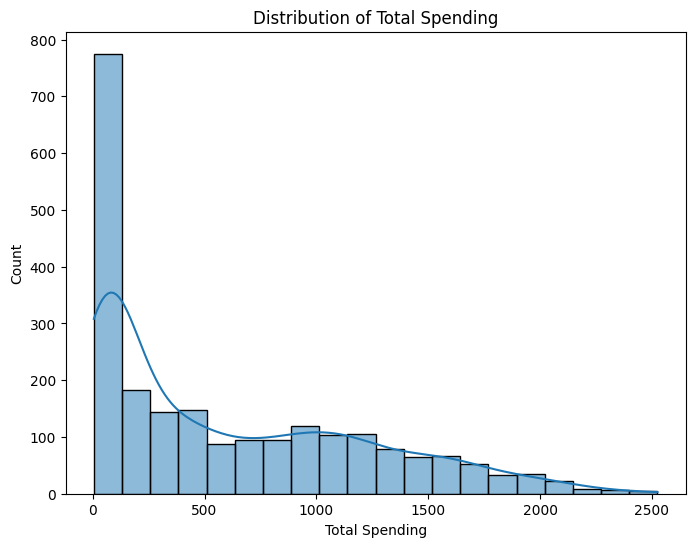

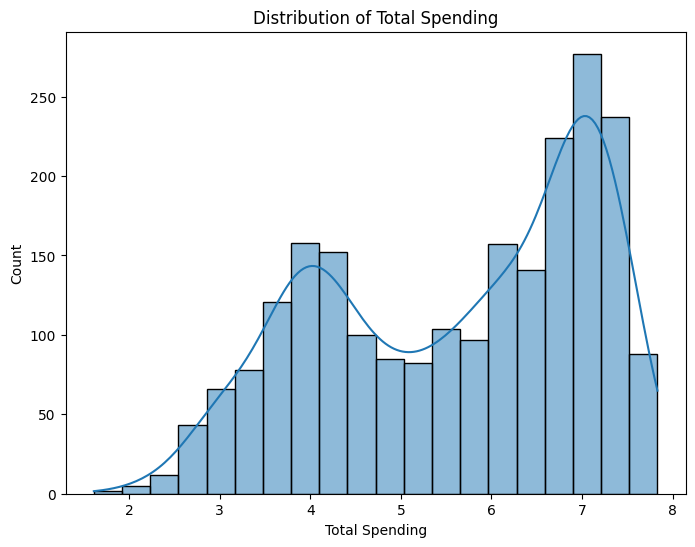

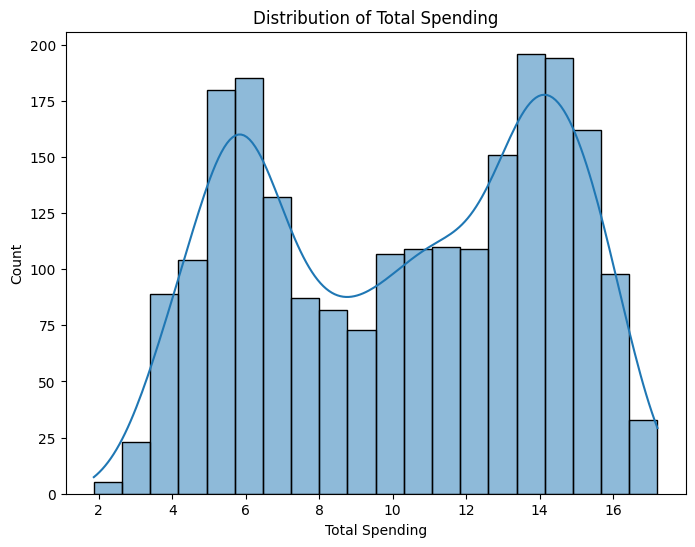

Expected Total Spending (Mean): 605.5410497981158
Standard Deviation of Total Spending: 601.0322282953767
Probability that Total Spending > 1000: 0.2558
Probability that Total Spending < 1000: 0.7442


In [ ]:
#Check distribution for total spending
plt.figure(figsize=(8,6))
sns.histplot(data['Total_Spending'], bins=20, kde=True)
plt.title('Distribution of Total Spending')
plt.xlabel('Total Spending')
plt.show()

#Its very right skewed distribution
#Perform log transformation
data['Total_Spending_log']=np.log(data['Total_Spending'])
plt.figure(figsize=(8,6))
sns.histplot(data['Total_Spending_log'], bins=20, kde=True)
plt.title('Distribution of Total Spending')
plt.xlabel('Total Spending')
plt.show()

#Now have two peaks(bimodal behavior) Try to apply box cox
from scipy.stats import boxcox
data['Total_Spending_boxcox'], _ = boxcox(data['Total_Spending'])
plt.figure(figsize=(8,6))
sns.histplot(data['Total_Spending_boxcox'], bins=20, kde=True)
plt.title('Distribution of Total Spending')
plt.xlabel('Total Spending')
plt.show()

#Still same we need to accept it

#Now try to find expected value and probability
mu_spending = data['Total_Spending'].mean()
sigma_spending = data['Total_Spending'].std()

print(f"Expected Total Spending (Mean): {mu_spending}")
print(f"Standard Deviation of Total Spending: {sigma_spending}")

#Find prbability of spending more than 1000
prob_spending_greater_1000 = 1 - norm.cdf(1000, mu_spending, sigma_spending)
print(f"Probability that Total Spending > 1000: {prob_spending_greater_1000:.4f}")
prob_spending_less_1000 = norm.cdf(1000, mu_spending, sigma_spending)
print(f"Probability that Total Spending < 1000: {prob_spending_less_1000:.4f}")

## Task 4: Insights and Customer Segmentation 📈

- **Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.**

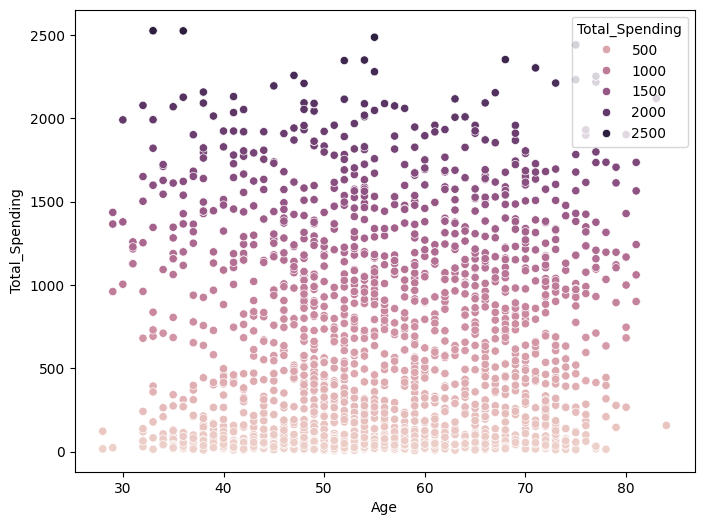

Correlation between Age and Total Spending: 0.11609034791580379


In [ ]:
# Try to visualize how spending vs age
plt.figure(figsize=(8,6))
sns.scatterplot(data=data,x='Age',y='Total_Spending',hue='Total_Spending')
plt.show()

correlation = data['Age'].corr(data['Total_Spending'])
print('Correlation between Age and Total Spending:', correlation)

As per above visual we can clearly see that there is no such impact of age on total spending there is only slight increase in total spending as age increases.


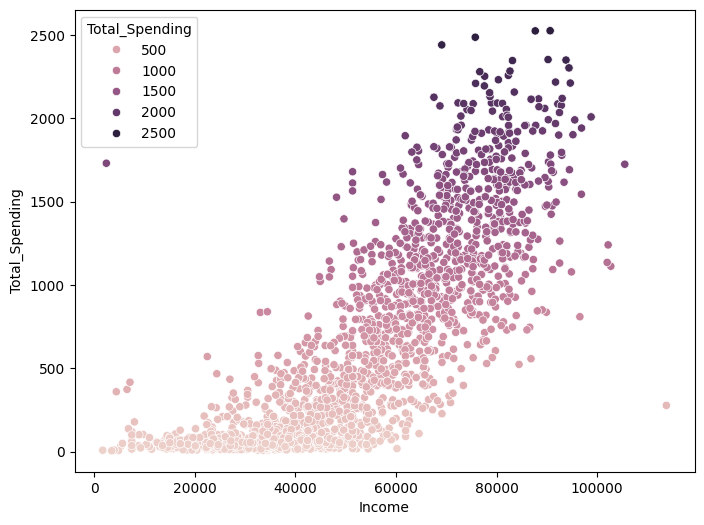

Correlation between Income and Total Spending: 0.8202215056408388


In [ ]:
#try same with income level
plt.figure(figsize=(8,6))
sns.scatterplot(data=data,x='Income',y='Total_Spending',hue='Total_Spending')
plt.show()

income_correlation= data['Income'].corr(data['Total_Spending'])
print('Correlation between Income and Total Spending:', income_correlation)


We can clearly observed that income have major impact on total spending ie:
As income increases total spending also increases

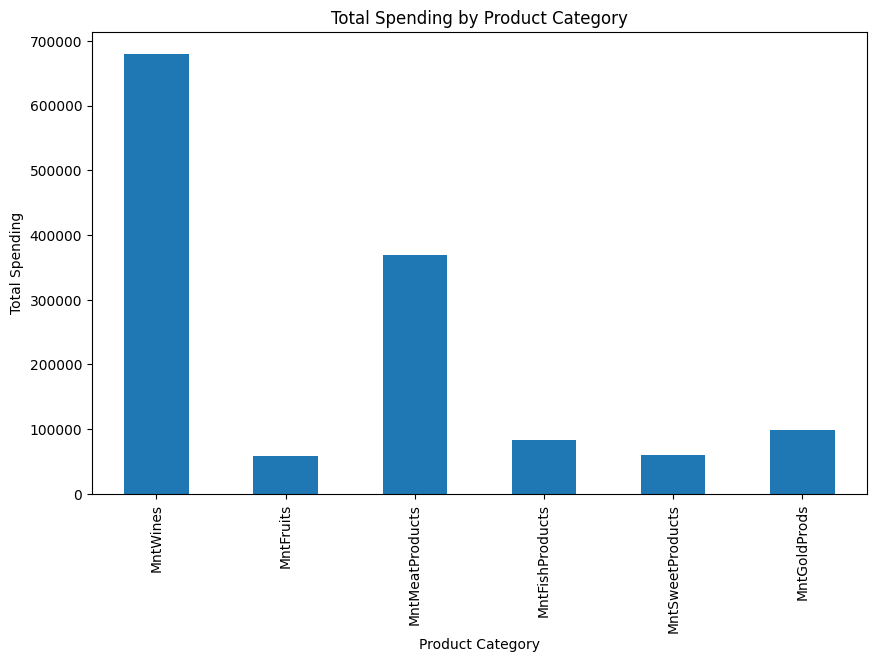

In [ ]:
#bar plot to show which category is important in total spending
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts',
                 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
plt.figure(figsize=(10, 6))
data[spending_cols].sum().plot(kind='bar')
plt.title('Total Spending by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Spending')
plt.show()




We can clearly see that the amount spent on wine products in the last 2 years plays important role in increasing total spending and on second number meat products

<ipython-input-28-662cb858c894>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=complain_counts.index, y=complain_counts.values, palette="magma")


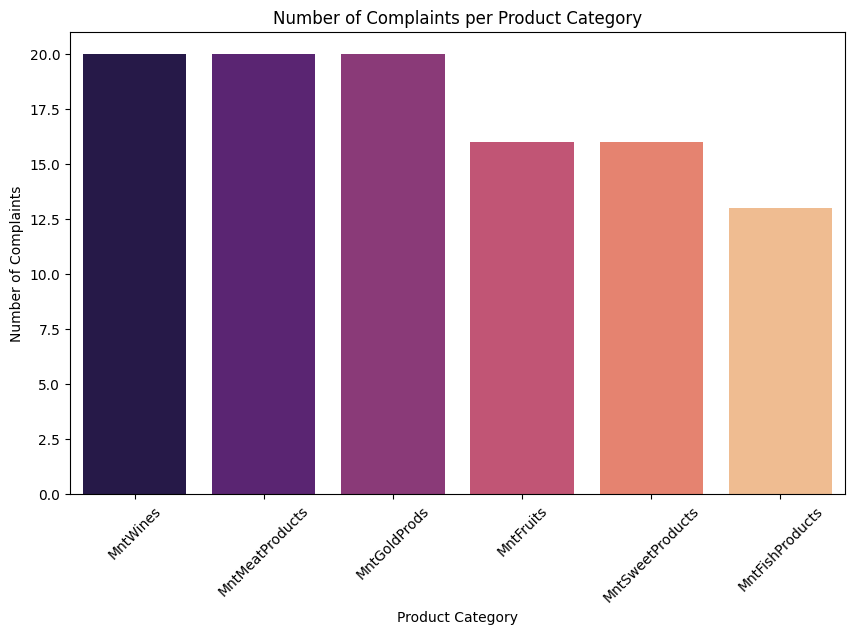

In [ ]:
complain_data = data[data['Complain'] == 1]

# Step 2: Spending categories
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts',
                 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Step 3: For each category, count how many customers spent > 0
complain_counts = (complain_data[spending_cols] > 0).sum().sort_values(ascending=False)

# Step 4: Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x=complain_counts.index, y=complain_counts.values, palette="magma")
plt.title('Number of Complaints per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.show()

Maximum number of complaints coming for wines,meat and gold products we need to enhance the quality for them

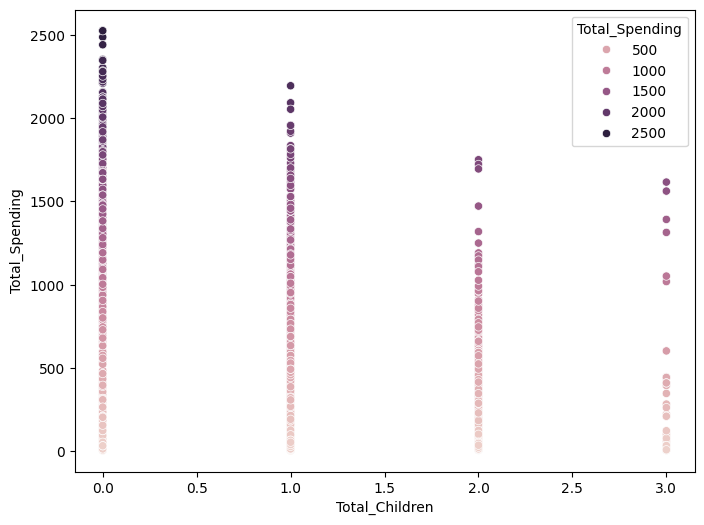

In [ ]:
# check the impact of total kids in home on total spending
plt.figure(figsize=(8,6))
sns.scatterplot(data=data,x='Total_Children',y='Total_Spending',hue='Total_Spending')
plt.show()

We can see as number of children increases total spending decreases


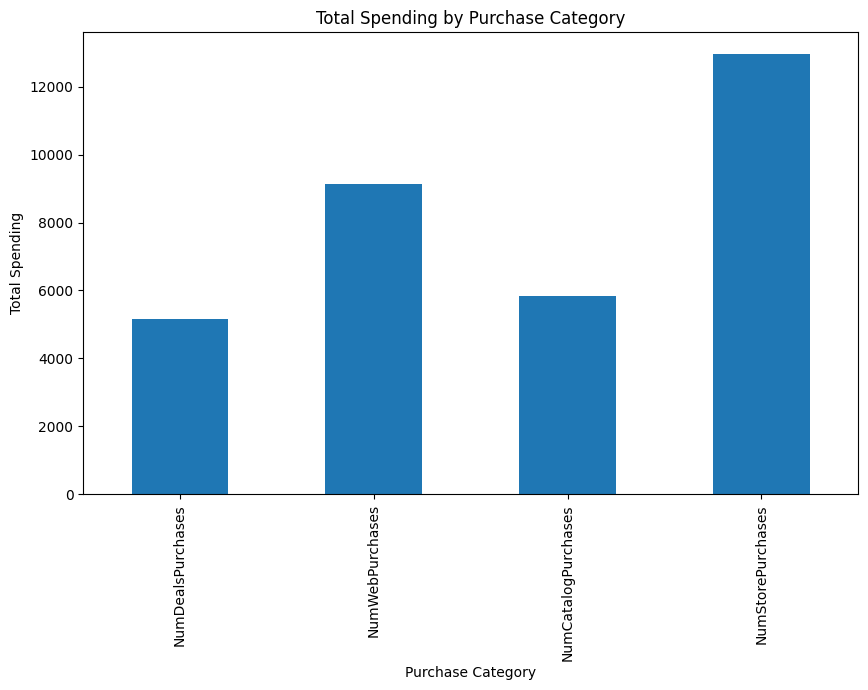

In [ ]:
#type of purchases versus total spending
type_purchases=['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']
plt.figure(figsize=(10,6))
data[type_purchases].sum().plot(kind='bar')
plt.title('Total Spending by Purchase Category')
plt.xlabel('Purchase Category')
plt.ylabel('Total Spending')
plt.show()

As we can see number of purchases from store is highest so we need to optimize our website to increase website traffic


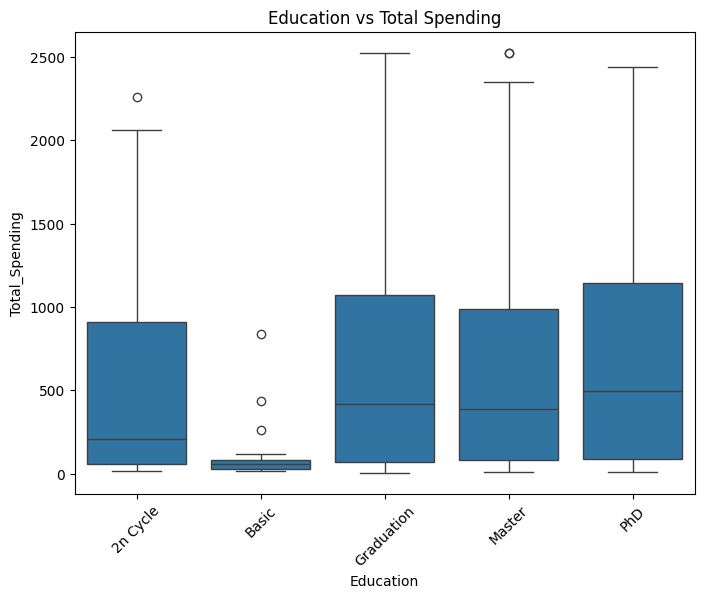

In [ ]:
#check the influnce of education in total spending
plt.figure(figsize=(8,6))
sns.boxplot(x=data['Education'], y=data['Total_Spending'])
plt.title('Education vs Total Spending')
plt.xticks(rotation=45)
plt.show()


Total customers who visited website: 2222
Total customers who purchased online: 2186
Website conversion rate: 98.38%


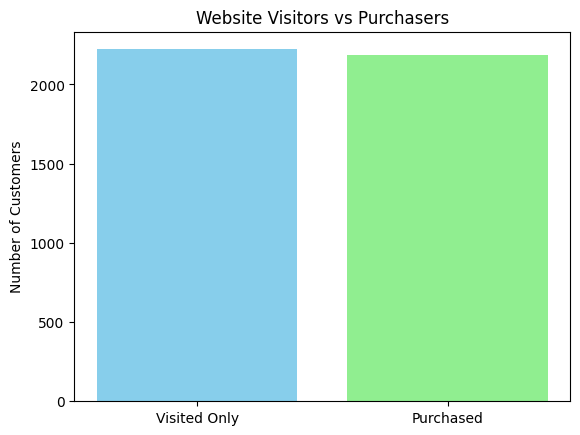

In [ ]:
#Check website visit versus website purchase conversion rate
# 1. How many customers visited website at least once
visited = data[data['NumWebVisitsMonth'] > 0].shape[0]

# 2. How many customers made at least one web purchase
purchased = data[data['NumWebPurchases'] > 0].shape[0]

# 3. Print results
print(f"Total customers who visited website: {visited}")
print(f"Total customers who purchased online: {purchased}")

# 4. Calculate % conversion (purchase/visit)
conversion_rate = (purchased / visited) * 100
print(f"Website conversion rate: {conversion_rate:.2f}%")

# Bar Chart
labels = ['Visited Only', 'Purchased']
counts = [visited, purchased]

plt.bar(labels, counts, color=['skyblue', 'lightgreen'])
plt.title('Website Visitors vs Purchasers')
plt.ylabel('Number of Customers')
plt.show()



Create customer segments


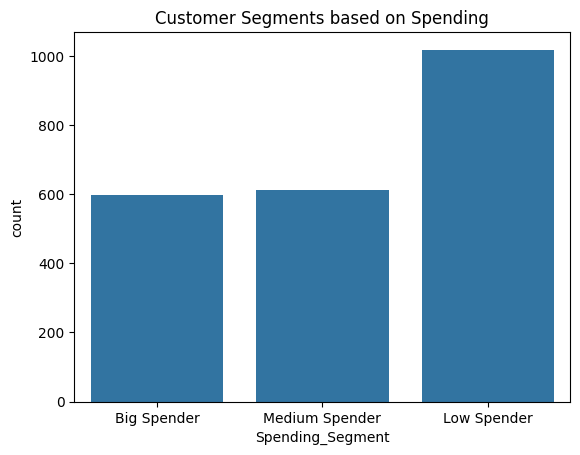

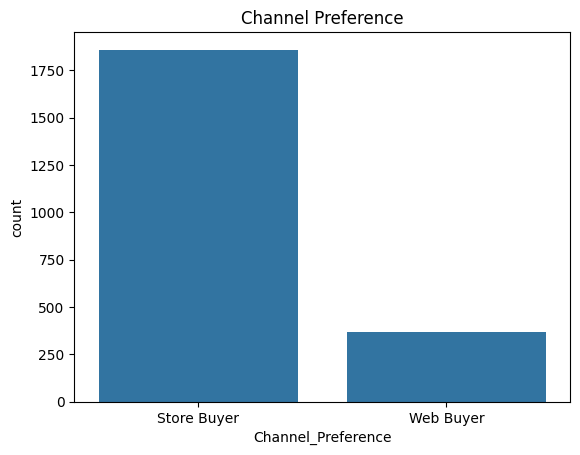

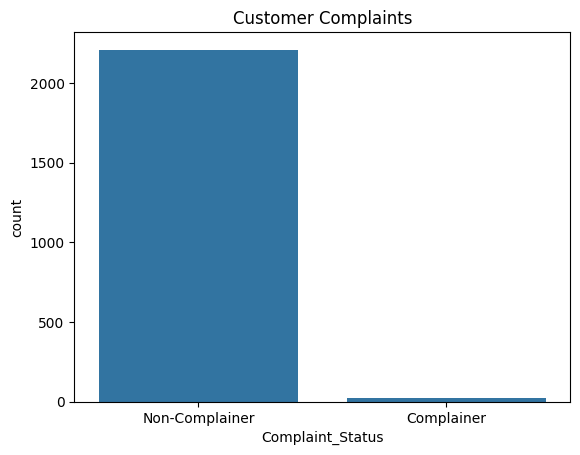

In [ ]:
# Define High Spenders (Top 25%), Low Spenders (Bottom 25%)
# 1. Spending Segment
def spending_segment(x):
    if x > 1000:
        return 'Big Spender'
    elif x < 300:
        return 'Low Spender'
    else:
        return 'Medium Spender'

data['Spending_Segment'] = data['Total_Spending'].apply(spending_segment)

# 2. Product Lover
data['Wine_Lover'] = data['MntWines'].apply(lambda x: 'Yes' if x > 500 else 'No')
data['Meat_Lover'] = data['MntMeatProducts'].apply(lambda x: 'Yes' if x > 500 else 'No')

# 3. Channel Preference
def channel_preference(row):
    if row['NumWebPurchases'] > row['NumStorePurchases']:
        return 'Web Buyer'
    else:
        return 'Store Buyer'

data['Channel_Preference'] = data.apply(channel_preference, axis=1)

# 4. Recency Segment
data['Recency_Segment'] = data['Recency'].apply(lambda x: 'Recent Buyer' if x < 30 else 'Dormant Customer')

# 5. Family Status
data['Family_Status'] = data.apply(lambda x: 'Family with Kids' if (x['Kidhome'] + x['Teenhome']) > 0 else 'No Kids', axis=1)

# 6. Complaint Status (already exists, just rename for clarity)
data['Complaint_Status'] = data['Complain'].apply(lambda x: 'Complainer' if x == 1 else 'Non-Complainer')

sns.countplot(x='Spending_Segment', data=data)
plt.title('Customer Segments based on Spending')
plt.show()

# Channel Preference Distribution
sns.countplot(x='Channel_Preference', data=data)
plt.title('Channel Preference')
plt.show()

# Complaint Status
sns.countplot(x='Complaint_Status', data=data)
plt.title('Customer Complaints')
plt.show()



## Task 5: Conclusion and Recommendations

- **Create clear visualizations to showcase your findings. Use insights to make recommendations for the company based on your analysis.**

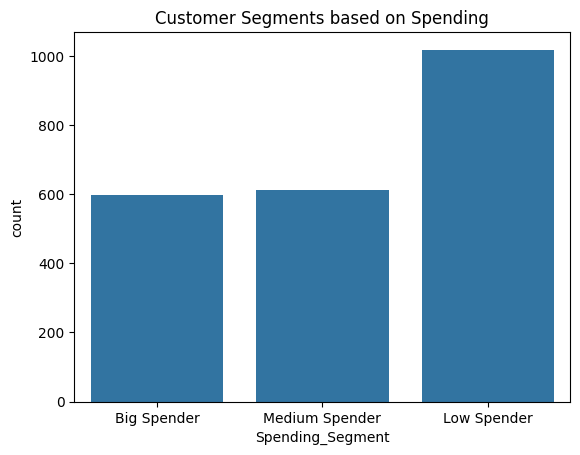

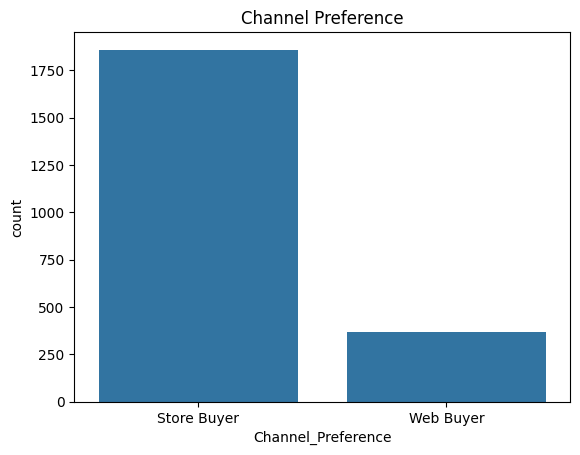

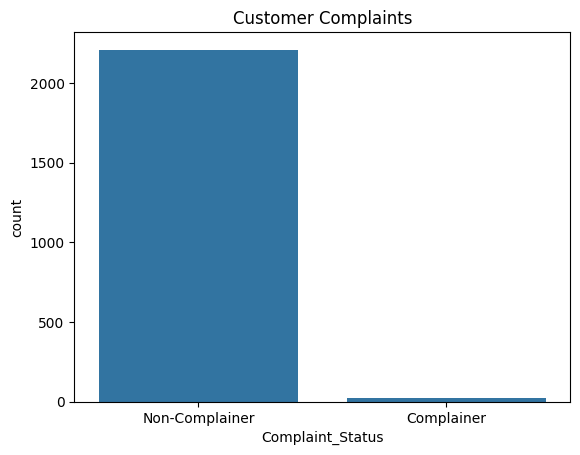

In [ ]:

sns.countplot(x='Spending_Segment', data=data)
plt.title('Customer Segments based on Spending')
plt.show()

# Channel Preference Distribution
sns.countplot(x='Channel_Preference', data=data)
plt.title('Channel Preference')
plt.show()

# Complaint Status
sns.countplot(x='Complaint_Status', data=data)
plt.title('Customer Complaints')
plt.show()


According to graph 1 wee need to more focus on Medium and high spender we need to do:
1:Targeted Promotions for Medium and Big Spenders.

2:Implement a loyalty program that rewards customers based on their spending levels.

3:Enhance Customer Service

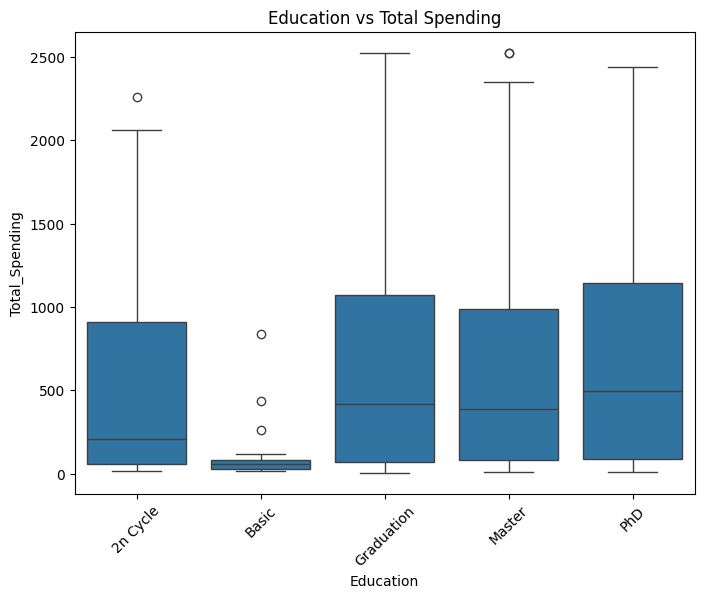

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x=data['Education'], y=data['Total_Spending'])
plt.title('Education vs Total Spending')
plt.xticks(rotation=45)
plt.show()


From this boxplot, we can clearly observe:

✅ Customers with PhD and Graduation spend more on average than others.

✅ Customers with only Basic education spend the least.

Recommendation:

-Content Marketing and Educational Resources

-Financial Accessibility and Payment Options

-Engage with local communities and organizations to build trust and establish a connection with this customer segment. Participate in local events, sponsor community initiatives, or partner with local businesses to reach this target audience.

-Focus on Essential Products and Everyday Needs

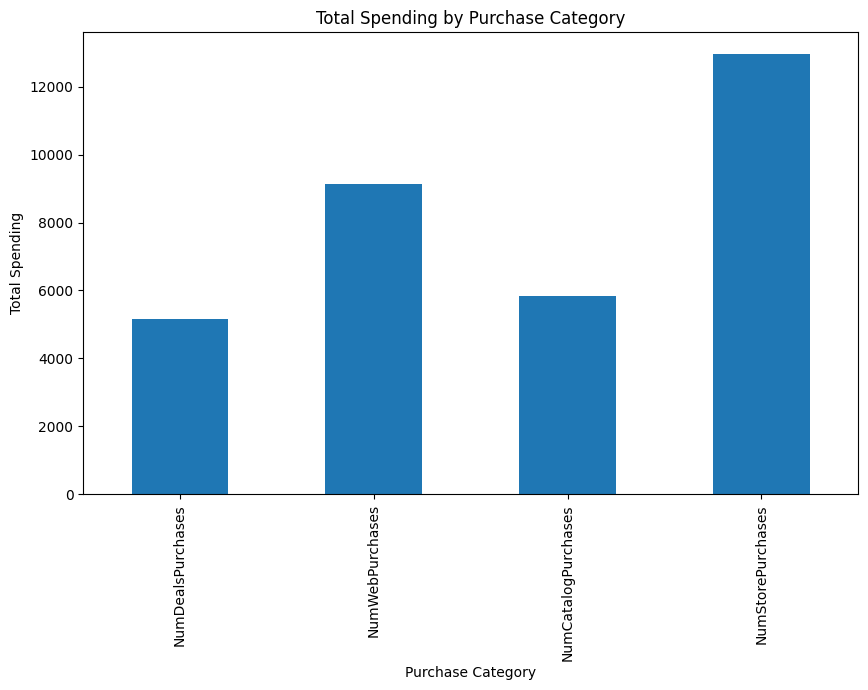

In [ ]:
type_purchases=['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']
plt.figure(figsize=(10,6))
data[type_purchases].sum().plot(kind='bar')
plt.title('Total Spending by Purchase Category')
plt.xlabel('Purchase Category')
plt.ylabel('Total Spending')
plt.show()

We can clearly see that most number of purchases made by customers visited in store

Recommendation:

1_ We can optimize our catalog.

2_ Make website more user frendly.

3_ Do campaigns to Build Trust and Security in customers that online transaction is safe and secure.

4_Offer Multiple Payment and Delivery Options.

5_Leverage Social Media and Online Marketing.

6_Offer Online-Exclusive Deals and Promotions.

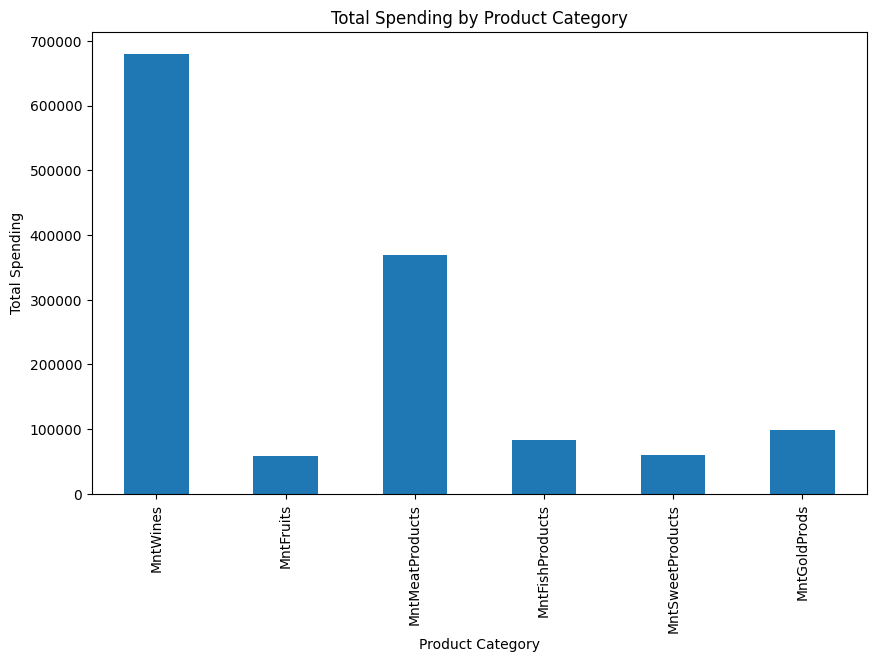

In [ ]:
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts',
                 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
plt.figure(figsize=(10, 6))
data[spending_cols].sum().plot(kind='bar')
plt.title('Total Spending by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Spending')
plt.show()

We can check from above graphs that max spending done on Wines and Meat products

Recommendation:

1: Enhance Quality of other products.

2: Try to provide offers.

<ipython-input-52-26c793496b19>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=complain_counts.index, y=complain_counts.values, palette="magma")


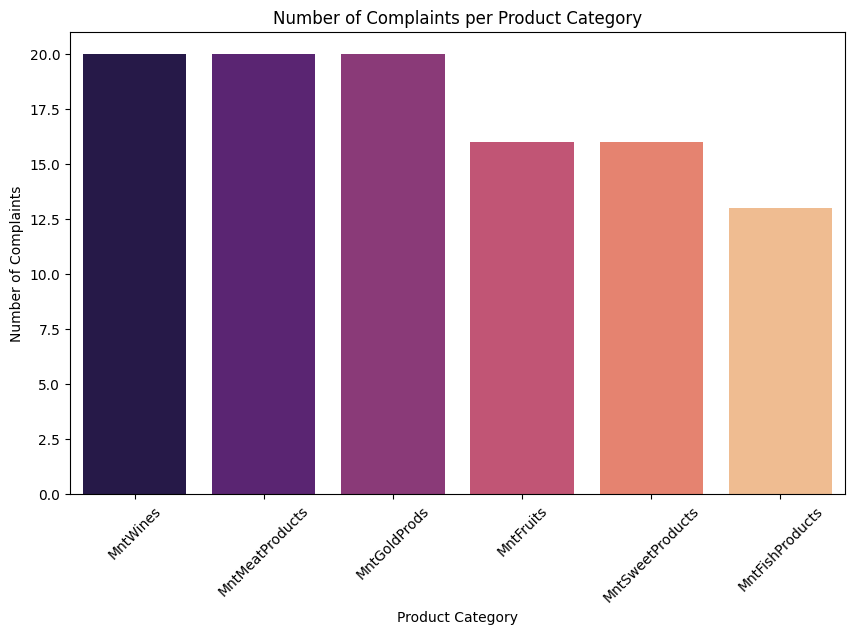

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=complain_counts.index, y=complain_counts.values, palette="magma")
plt.title('Number of Complaints per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.show()

From above graph we can get to know that most number of complains coming out from our wines, meat products, gold progucts

Recommendations to Address Complaints:

1. Enhance Product Quality and Handling.

2. Improve Customer Service and Complaint Resolution

3. Implement Preventative Measures


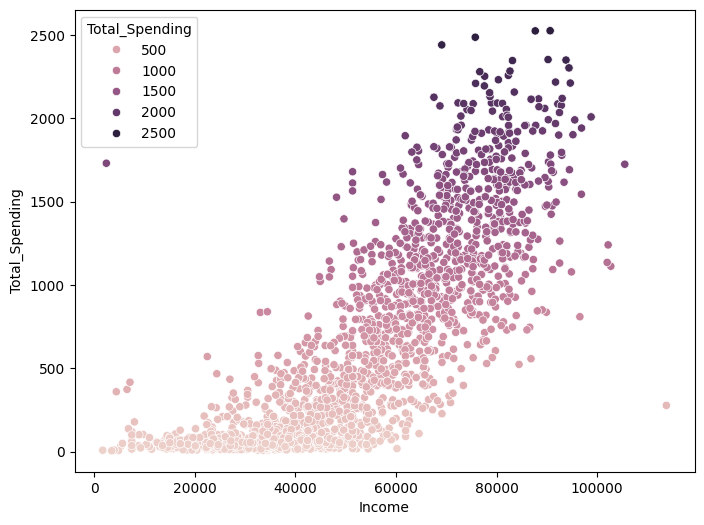

Correlation between Income and Total Spending: 0.8202215056408388


In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data,x='Income',y='Total_Spending',hue='Total_Spending')
plt.show()

income_correlation= data['Income'].corr(data['Total_Spending'])
print('Correlation between Income and Total Spending:', income_correlation)

We can clearly observed that income have major impact on total spending ie:
As income increases total spending also increases